<a href="https://colab.research.google.com/github/divyuk/deep-learning/blob/dl-1/wine_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
#import Libraries

#for number manipulation
import numpy as np

#for dataset
import pandas as pd

# for DL modeling
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader,TensorDataset
from sklearn.model_selection import train_test_split

# for data visuialization
import matplotlib.pyplot as plt
import seaborn as sns

# To compute execution speed
import time

# Import dataset

In [63]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
data = pd.read_csv(url)

In [64]:
data.head()

,"fixed acidity;""volatile acidity"";""citric acid"";""residual sugar"";""chlorides"";""free sulfur dioxide"";""total sulfur dioxide"";""density"";""pH"";""sulphates"";""alcohol"";""quality"""
0,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5
1,7.8;0.88;0;2.6;0.098;25;67;0.9968;3.2;0.68;9.8;5
2,7.8;0.76;0.04;2.3;0.092;15;54;0.997;3.26;0.65;...
3,11.2;0.28;0.56;1.9;0.075;17;60;0.998;3.16;0.58...
4,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5


Since the sep is not comma but ; hence using sep = ';'

In [65]:
data = pd.read_csv(url, sep=';')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [66]:
#decribe the data
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [67]:
# unique values per column
for i in data.keys():
  print(f'{i} has {len(np.unique(data[i]))} unique values')

fixed acidity has 96 unique values
volatile acidity has 143 unique values
citric acid has 80 unique values
residual sugar has 91 unique values
chlorides has 153 unique values
free sulfur dioxide has 60 unique values
total sulfur dioxide has 144 unique values
density has 436 unique values
pH has 89 unique values
sulphates has 96 unique values
alcohol has 65 unique values
quality has 6 unique values


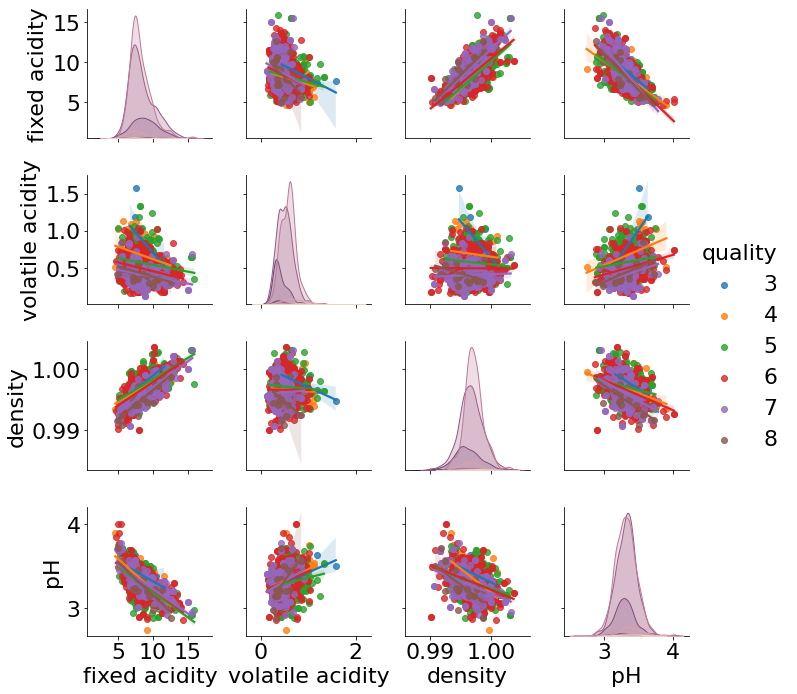

In [68]:
#plotting pairwise
plot_list = ['fixed acidity', 'volatile acidity' , 'density' ,'pH' , 'quality']
sns.pairplot(data = data[plot_list] , hue='quality' , kind ='reg')
plt.show()

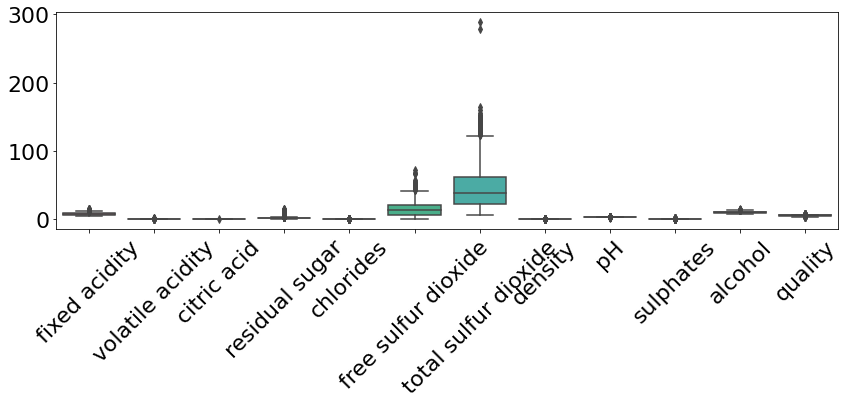

In [69]:
#Plotting some more data
fig,ax = plt.subplots(1,figsize=(14,4))
ax = sns.boxplot(data=data)
ax.set_xticklabels(ax.get_xticklabels() , rotation = 45)
plt.show()

The difference in numerical quantity between data values is problamatic for deep learning, hence data Normalization is an important to do.!

In [70]:
#Using z-score for normalization
#applying on except on quality
cols = data.keys()
cols = cols.drop('quality')

#z-score
for col in cols:
  mean = np.mean(data[col])
  sd = np.std(data[col],ddof =1) #ddof = shorturl.at/kOPV2
  data[col] = (data[col]-mean)/sd

data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1599.000000
mean,3.554936e-16,1.688594e-16,-1.066481e-16,-1.110917e-16,3.554936e-16,-6.221137e-17,2.666202e-17,-3.469617e-14,2.861723e-15,6.665504e-16,7.109871e-17,5.636023
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.807569
min,-2.136377e+00,-2.277567e+00,-1.391037e+00,-1.162333e+00,-1.603443e+00,-1.422055e+00,-1.230199e+00,-3.537625e+00,-3.699244e+00,-1.935902e+00,-1.898325e+00,3.000000
25%,-7.004996e-01,-7.696903e-01,-9.290275e-01,-4.530767e-01,-3.711129e-01,-8.484502e-01,-7.438076e-01,-6.075656e-01,-6.549356e-01,-6.380200e-01,-8.661079e-01,5.000000
50%,-2.410190e-01,-4.367545e-02,-5.634264e-02,-2.402999e-01,-1.798892e-01,-1.792441e-01,-2.574163e-01,1.759533e-03,-7.210449e-03,-2.250577e-01,-2.092427e-01,6.000000
75%,5.056370e-01,6.264921e-01,7.650078e-01,4.340257e-02,5.382858e-02,4.899619e-01,4.721707e-01,5.766445e-01,5.757422e-01,4.238832e-01,6.352984e-01,6.000000
max,4.353787e+00,5.876138e+00,3.742403e+00,9.192806e+00,1.112355e+01,5.365606e+00,7.372847e+00,3.678904e+00,4.526866e+00,7.916200e+00,4.201138e+00,8.000000


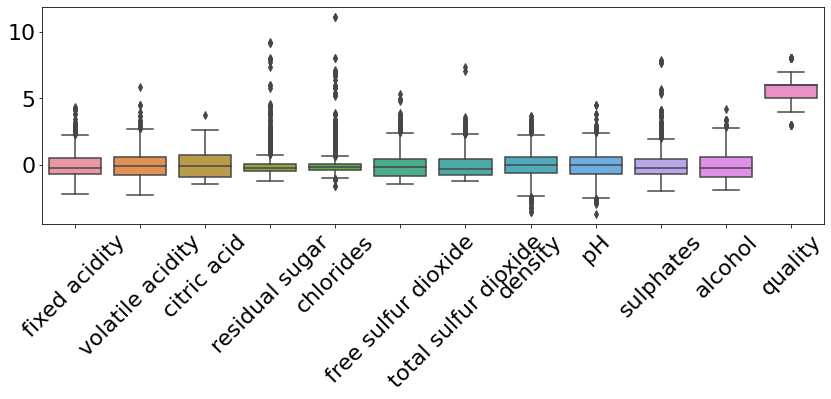

In [71]:
# after applying Normalization
fig,ax = plt.subplots(1,figsize=(14,4))
ax = sns.boxplot(data=data)
ax.set_xticklabels(ax.get_xticklabels() , rotation = 45)
plt.show()

There are some outliers but all data values looks close to zero

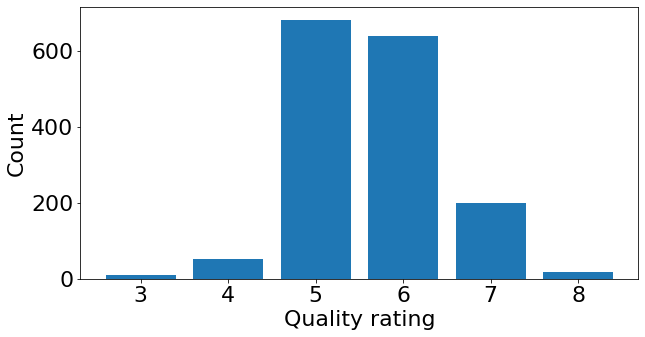

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


,quality,boolQuality
0,5,0
1,5,0
2,5,0
3,6,1
4,5,0
...,...,...
1594,5,0
1595,6,1
1596,6,1
1597,5,0


In [72]:
#Plot of distribution of quality values
fig  = plt.figure(figsize=(10,5))
plt.rcParams.update({'font.size': 22}) # increase font size in the figure
counts = data['quality'].value_counts()
plt.bar(list(counts.keys()),counts)
plt.xlabel('Quality rating')
plt.ylabel('Count')
plt.show()

# create a new column for binarized (boolean) quality
data['boolQuality'] = 0
data['boolQuality'][data['quality']>5] = 1

data[['quality','boolQuality']]

# Reorganize the dataset

In [73]:
# convert from pandas dataframe to tensor
dataT  = torch.tensor( data[cols].values ).float()
labels = torch.tensor( data['boolQuality'].values ).float()

print( dataT.shape )
print( labels.shape )
print(labels[0:4])
# labels not in 1D array but 2D
labels = labels[:,None]
print( labels.shape )
print(labels[0:4])

torch.Size([1599, 11])
torch.Size([1599])
tensor([0., 0., 0., 1.])
torch.Size([1599, 1])
tensor([[0.],
        [0.],
        [0.],
        [1.]])


In [74]:
# use scikitlearn to split the data
train_data,test_data, train_labels,test_labels = train_test_split(dataT, labels, test_size=.1)


# then convert them into PyTorch Datasets (note: already converted to tensors)
train_data = TensorDataset(train_data,train_labels)
test_data  = TensorDataset(test_data,test_labels)

# Model


In [85]:
class ANNwine(nn.Module):
  def __init__(self):
    super().__init__()

    # Input Layer
    self.input = nn.Linear(11,32)
    # Hidden Layer
    self.fullconnected1 = nn.Linear(32,32)
    self.fullconnected2 = nn.Linear(32,32)
    # Output Layer
    self.output = nn.Linear(32,1)

    # Forward Pass
  def forward(self,x):
    x = F.relu(self.input(x))
    x = F.relu(self.fullconnected1(x))
    x = F.relu(self.fullconnected2(x))
    return self.output(x)

# Train The Model

In [88]:
numepochs  = 1000

def train_the_model(winenet , train_loader , test_loader):
  
  # 1) Define Loss function and Optimizer
  lossfun = nn.BCEWithLogitsLoss()
  optimizer = torch.optim.SGD(winenet.parameters() , lr=0.01)

  # Initialize Losses
  losses = torch.zeros(numepochs)
  trainAcc = []
  testAcc  = []

  # Loop over one complete pass :: epochs
  for epochi in range(numepochs):

    # Switch on the training mode
    winenet.train()

    # Initialize the batches
    batchAcc = []
    batchLoss = []
    for x,y in train_loader:
      
      # Forward Pass
      yhat = winenet(x)
      loss = lossfun(yhat , y)

      # BackProp
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      # Loss from the batch
      batchLoss.append(loss.item())
      # Training accuracy for this batch
      batchAcc.append(100*torch.mean(( (yhat>0)==y).float()).item())#.item() ensures that you append only the float values 
                                                                    #to the list rather the tensor itself.
                                                                    # You are basically converting a single element tensor value 
                                                                    #to a python number.
      # end of Batch
    # Now average training accurracy of the batch
    trainAcc.append(np.mean(batchAcc))
    # Get average Loss across the batch
    losses[epochi] = np.mean(batchLoss)

    # Test accuraccy
    winenet.eval()
    xt,yt = next(iter(test_loader))
    with torch.no_grad():
      ytest = winenet(xt)
    testAcc.append(100*torch.mean(( (ytest>0)==yt).float()).item())
  return trainAcc,testAcc,losses
                      

# Parametric experiment to change the mini-batch size

In [89]:
batchsizes = 2**np.arange(1,10,2)

# Initialize output results matrices
accuracyResultsTrain = np.zeros((numepochs,len(batchsizes)))
accuracyResultsTest  = np.zeros((numepochs,len(batchsizes)))
comptime             = np.zeros(len(batchsizes))

# test data doesn't vary by training batch size
test_loader = DataLoader(test_data,batch_size=test_data.tensors[0].shape[0])

# loop over batch sizes
for bi in range(len(batchsizes)):

  # start the clock!
  starttime = time.process_time()

  # create dataloader object
  train_loader = DataLoader(train_data,
                          batch_size=int(batchsizes[bi]), shuffle=True, drop_last=True)

  # create and train a model
  winenet = ANNwine()
  trainAcc,testAcc,losses = train_the_model(winenet , train_loader , test_loader)

  # store data
  accuracyResultsTrain[:,bi] = trainAcc
  accuracyResultsTest[:,bi]  = testAcc

  # check the timer
  comptime[bi] = time.process_time() - starttime

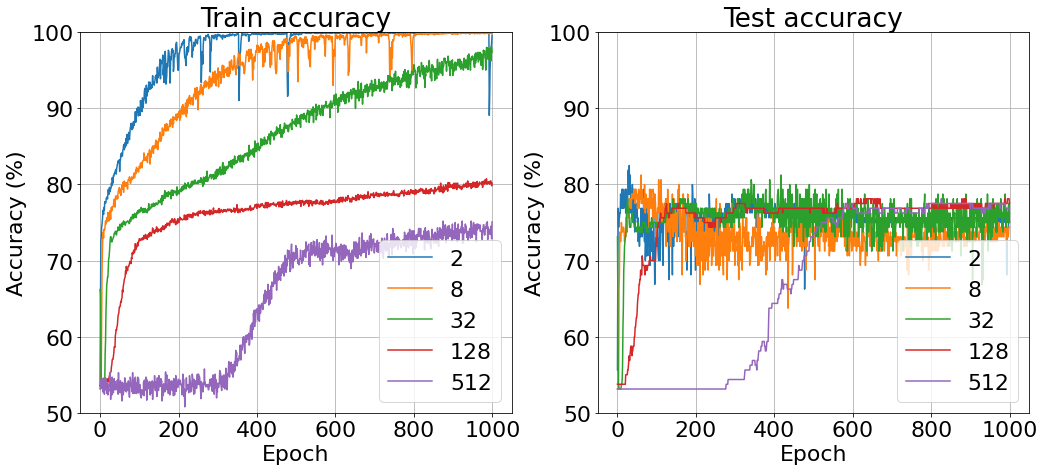

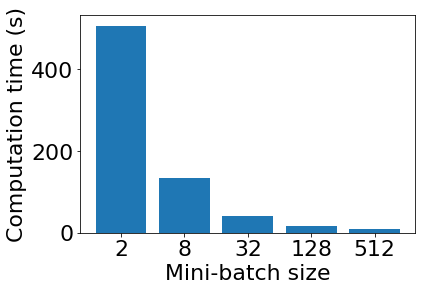

In [90]:
# plot some results
fig,ax = plt.subplots(1,2,figsize=(17,7))

ax[0].plot(accuracyResultsTrain)
ax[0].set_title('Train accuracy')
ax[1].plot(accuracyResultsTest)
ax[1].set_title('Test accuracy')

# common features
for i in range(2):
  ax[i].legend(batchsizes)
  ax[i].set_xlabel('Epoch')
  ax[i].set_ylabel('Accuracy (%)')
  ax[i].set_ylim([50,100])
  ax[i].grid()

plt.show()



# bar plot of computation time
plt.bar(range(len(comptime)),comptime,tick_label=batchsizes)
plt.xlabel('Mini-batch size')
plt.ylabel('Computation time (s)')
plt.show()

The Best batch can be seen 128.
Low batch is trying to overfit the data
